In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# GET DataFrame

In [10]:
df=pd.read_csv('/home/louisedantas/code/LouiseDantas/vinted/Result_5.csv')

# Clean and Process Data

a. Check for Duplicates

In [11]:
df[df.duplicated()]
duplicate_count=len(df[df.duplicated()])

In [12]:
df=df.drop_duplicates()

b. Check for Missing Values

In [13]:
df.isnull().sum()/len(df)

basket_item_id        0.0
basket_id             0.0
customer_id           0.0
sales_channel_id      0.0
country_id            0.0
category_id           0.0
product               0.0
quantity              0.0
price_total           0.0
date_trading_nk       0.0
category_id.1         0.0
category_l1_name      0.0
category_l2_name      0.0
sales_channel_id.1    0.0
sales_channel_name    0.0
country_id.1          0.0
country_name          0.0
dtype: float64

c. Check Outliers

# EDA

## Explore overall

In [8]:
df_agg

,basket_item_id,basket_id,customer_id,sales_channel_id,country_id,category_id,product,quantity,price_total,date_trading_nk,category_id.1,category_l1_name,category_l2_name,sales_channel_id.1,sales_channel_name,country_id.1,country_name
0,0654e2f726656877a10cd57eaf5e7d6f,59f2f4a1b87c63e97bf52241699a4387,59f2f4a1b87c63e97bf52241699a4387,2,2,l1-1|l2-46,82005b5333cfe3b63634cf1afaac86af,2,14.57,2021-03-07,l1-1|l2-46,Category 1,Category 46,2,In-store,2,Country B
1,09dc3beeecfe20053b6285e4e2336f65,59f2f4a1b87c63e97bf52241699a4387,59f2f4a1b87c63e97bf52241699a4387,2,2,l1-1|l2-46,82005b5333cfe3b63634cf1afaac86af,1,12.86,2021-03-07,l1-1|l2-46,Category 1,Category 46,2,In-store,2,Country B
2,30ef02221c8f50db650692477824ee0f,11ac30665340ab946544a1e72edf57fd,3e1cb144d5b44ec59f4cc27ad99ec168,1,1,l1-4|l2-1,3e32de32b8cf2f3d8e72ecfcf99daee1,2,3.02,2021-03-07,l1-4|l2-1,Category 4,Category 1,1,Online,1,Country A
3,cac3b10c1a1b5e386bf577f2fb0bf3eb,137c0d89e82b17117b98ac481471e873,805ed8a2dca893e833352dbedc09eaf6,2,1,l1-2|l2-97,abec16f483abb4f1810ca029aadf8446,1,12.76,2021-03-07,l1-2|l2-97,Category 2,Category 97,2,In-store,1,Country A
4,35103592a32e764df0dbb87cb4935b3d,00dd292ec592a7e8c1c620f7648d22d3,ab9a28456f30829f81cf8bcdab3729d7,2,1,l1-4|l2-4,721954837adbdf1aeecdf6d31715536f,1,2.55,2021-03-07,l1-4|l2-4,Category 4,Category 4,2,In-store,1,Country A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265984,a2996a0cced841c87664efec212e119f,3a94bb89465380597303256696ec8e08,3a94bb89465380597303256696ec8e08,2,3,l1-1|l2-101,9acf1b76f369030270de8f98f84d6707,2,16.36,2021-09-21,l1-1|l2-101,Category 1,Category 101,2,In-store,3,Country C
265985,dac9d751feeabcde8dd0d702d7506466,2d302da31437cf0118e505abbe45d2a9,ec898debc89593257aec91a6f9a15dd4,2,3,l1-1|l2-68,4edaa105d5f53590338791951e38c3ad,1,2.92,2021-09-21,l1-1|l2-68,Category 1,Category 68,2,In-store,3,Country C
265986,8d5940dca748ddad8ea7c5b089b0b225,2d302da31437cf0118e505abbe45d2a9,ec898debc89593257aec91a6f9a15dd4,2,3,l1-1|l2-68,4edaa105d5f53590338791951e38c3ad,2,13.27,2021-09-21,l1-1|l2-68,Category 1,Category 68,2,In-store,3,Country C
265987,9e32aeeebaffed9f407858da35336403,56be8d74bad5b7886d5b29b00d35bd78,6ec318032e870de821d22f09cfe00883,2,1,l1-1|l2-65,9c70cb2f32394f12a8527ccb82da9942,1,18.90,2021-09-21,l1-1|l2-65,Category 1,Category 65,2,In-store,1,Country A


<AxesSubplot:xlabel='price_total', ylabel='quantity'>

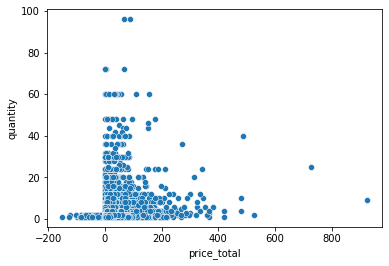

In [9]:
#investigate sales vs share of one star
sns.scatterplot(x=df_agg['price_total'],y=df_agg['quantity'])

In [ ]:
fig = plt.subplots(figsize=(12,7))
sns.scatterplot(data=sorted_sellers,x=sorted_sellers['share_of_one_stars'],y=sorted_sellers['delay_to_carrier'],hue='Tier',size='month_integer')

In [ ]:
features=data.columns
rs=round(data.loc[data.type=='red',features].describe(),2)
ws=round(data.loc[data.type=='white',features].describe(),2)

pd.concat([rs,ws],axis=0,keys=['Red Wine Stats', 'White Wine Stats']).T

In [ ]:
corr=data.corr()

# EVOLUTION OF KEY BUSINESS METRICS

### BLA

# BLA